In [7]:
!pip install pandas matplotlib seaborn missingno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
print(" Chargement des bibliothèques...")

 Chargement des bibliothèques...


In [10]:
# --- 2. Statistiques descriptives ---

train = pd.read_csv("Data/raw/airbnb_train.csv")  # Adapter le chemin si nécessaire

# --- 1. Aperçu général ---
print(" Structure du dataset :")
display(train.info())
display(train.describe().T.round(2))

 Structure du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_

None

,count,mean,std,min,25%,50%,75%,max
id,22234.0,11222692.18,6080480.28,3362.00,6202924.25,12174250.00,16395021.50,21204503.00
log_price,22234.0,4.78,0.72,2.30,4.32,4.70,5.22,7.60
accommodates,22234.0,3.16,2.14,1.00,2.00,2.00,4.00,16.00
bathrooms,22183.0,1.24,0.59,0.00,1.00,1.00,1.00,8.00
latitude,22234.0,38.46,3.07,33.34,34.14,40.66,40.75,42.39
longitude,22234.0,-92.27,21.67,-122.51,-118.34,-76.99,-73.95,-70.99
number_of_reviews,22234.0,20.67,37.18,0.00,1.00,6.00,23.00,505.00
review_scores_rating,17256.0,94.07,7.78,20.00,92.00,96.00,100.00,100.00
bedrooms,22208.0,1.26,0.85,0.00,1.00,1.00,1.00,10.00
beds,22199.0,1.71,1.25,0.00,1.00,1.00,2.00,18.00


In [12]:
# --- 3. Valeurs manquantes ---
print(" Valeurs manquantes :")
missing = train.isnull().mean().sort_values(ascending=False) * 100
missing = missing[missing > 0]
display(missing.round(2))

 Valeurs manquantes :


host_response_rate        24.62
review_scores_rating      22.39
first_review              21.25
last_review               21.21
neighbourhood              9.38
zipcode                    1.36
host_identity_verified     0.25
host_since                 0.25
host_has_profile_pic       0.25
bathrooms                  0.23
beds                       0.16
bedrooms                   0.12
dtype: float64

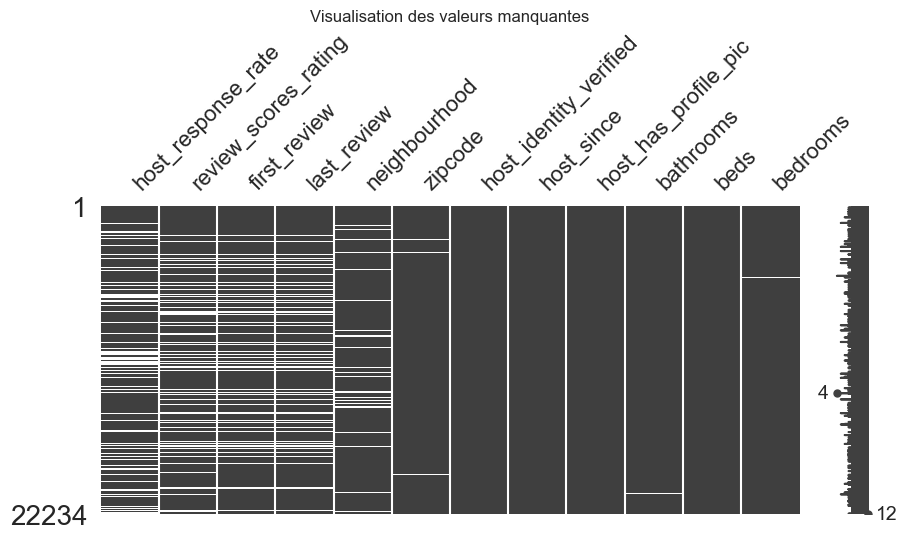

In [13]:
# 🔍 Affichage graphique des valeurs manquantes
if not missing.empty:
    msno.matrix(train[missing.index], figsize=(10, 4))
    plt.title("Visualisation des valeurs manquantes")
    plt.show()

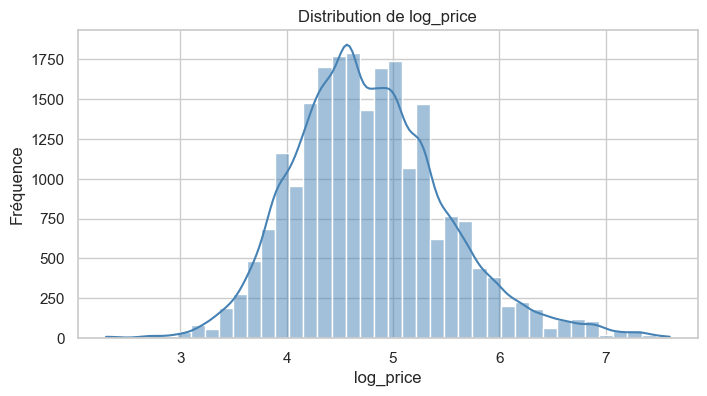

In [14]:
# --- 4. Distribution de log_price ---
plt.figure(figsize=(8, 4))
sns.histplot(train['log_price'], bins=40, kde=True, color='steelblue')
plt.title('Distribution de log_price')
plt.xlabel('log_price')
plt.ylabel('Fréquence')
plt.show()

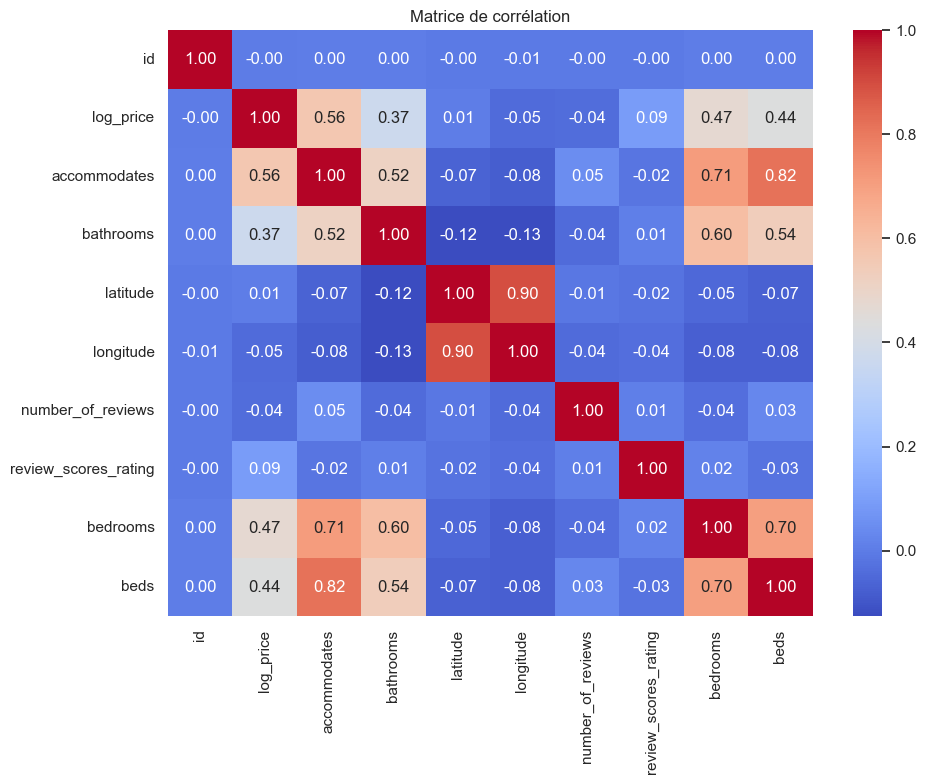

In [15]:
#Corrélation entre les variables numériques ---
plt.figure(figsize=(10, 8))
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

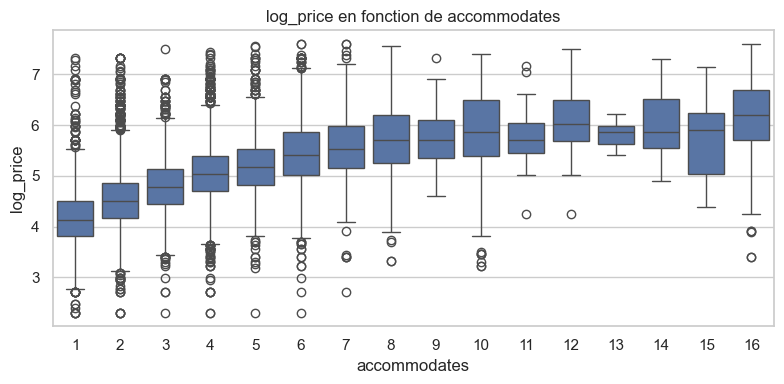

In [16]:
# --- 6. Relation entre accommodates et log_price ---
plt.figure(figsize=(8, 4))
sns.boxplot(x='accommodates', y='log_price', data=train)
plt.title("log_price en fonction de accommodates")
plt.tight_layout()
plt.show()

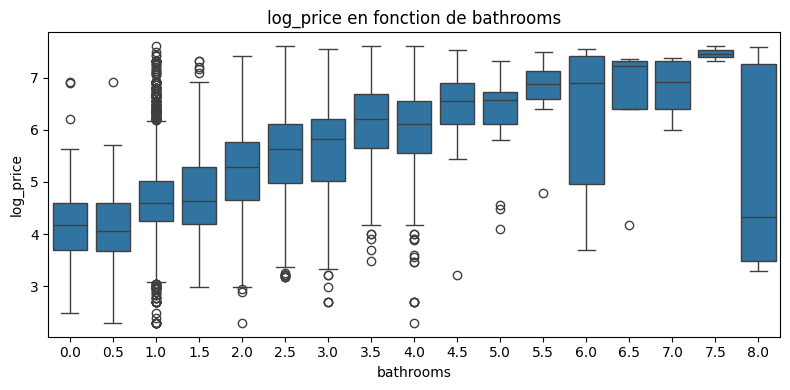

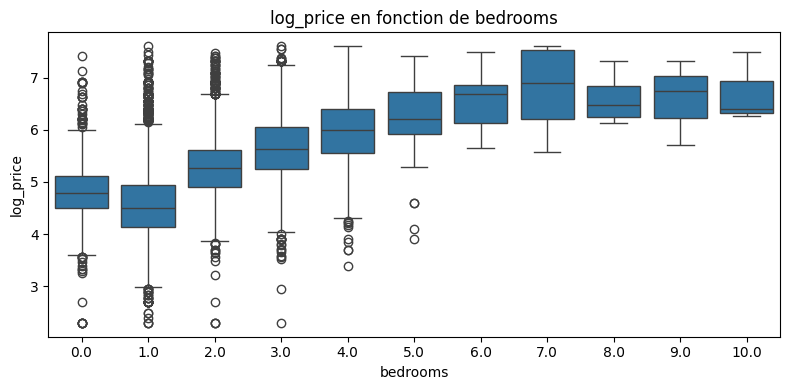

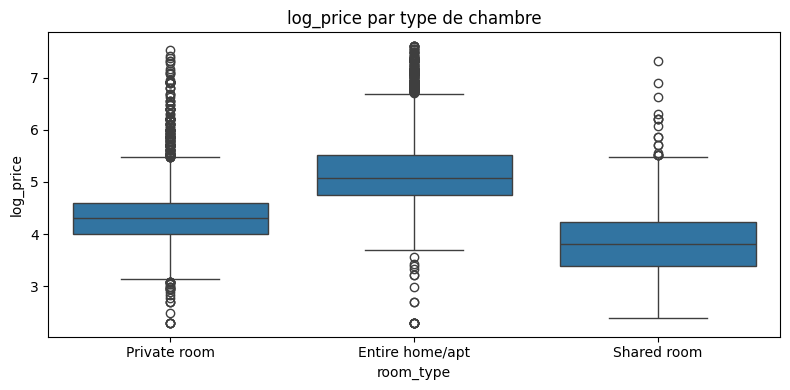

In [60]:
# --- Boxplot pour bathrooms, bedrooms ---
plt.figure(figsize=(8, 4))
sns.boxplot(x='bathrooms', y='log_price', data=train)
plt.title("log_price en fonction de bathrooms")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='bedrooms', y='log_price', data=train)
plt.title("log_price en fonction de bedrooms")
plt.tight_layout()
plt.show()

# --- Boxplot pour room_type ---
plt.figure(figsize=(8, 4))
sns.boxplot(x='room_type', y='log_price', data=train)
plt.title("log_price par type de chambre")
plt.tight_layout()
plt.show()


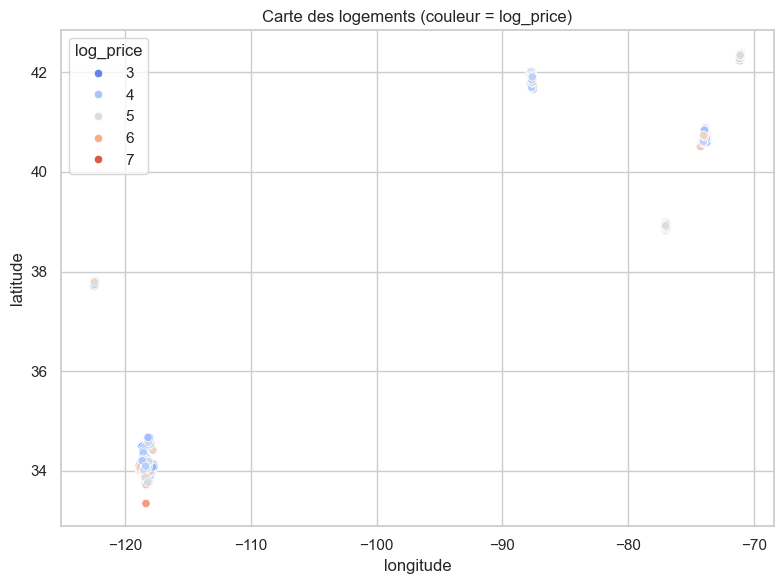

In [17]:
# --- Carte rapide avec latitude / longitude ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='log_price', palette='coolwarm', data=train)
plt.title("Carte des logements (couleur = log_price)")
plt.tight_layout()
plt.show()


In [20]:
# --- Supprimer description, name si pas utilisées plus tard ---
train = train.drop(columns=['description', 'name'], errors='ignore')

# --- Nettoyage zipcode ---
train['zipcode_clean'] = train['zipcode'].astype(str).str.extract(r'(\d{5})')
train['zipcode_clean'] = pd.to_numeric(train['zipcode_clean'], errors='coerce')

# --- Nettoyage de amenities : compter le nombre d’équipements ---
train['amenities_count'] = train['amenities'].astype(str).apply(lambda x: len(x.strip('{}').split(',')))


etape 3 traietemnt 

In [26]:
# Installation de numpy (si nécessaire dans un environnement Jupyter)
%pip install numpy

import numpy as np
import pandas as pd
from datetime import datetime

# Copie du jeu de données d'entraînement pour simuler un test set (à adapter en vrai contexte)
test = train.copy()

# --- 🔁 Copie de sécurité ---
train_encoded = train.copy()
test_encoded = test.copy()

# --- 1. Imputation des colonnes numériques par la médiane ---
num_cols = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
for col in num_cols:
    median_val = train_encoded[col].median()
    train_encoded[col] = train_encoded[col].fillna(median_val)
    test_encoded[col] = test_encoded[col].fillna(median_val)

# --- 2. Imputation des colonnes catégorielles par le mode ---
cat_cols = ['bed_type', 'cancellation_policy', 'city', 'zipcode', 'neighbourhood']
for col in cat_cols:
    mode_val = train_encoded[col].mode(dropna=True)[0]
    train_encoded[col] = train_encoded[col].fillna(mode_val)
    test_encoded[col] = test_encoded[col].fillna(mode_val)

# --- 3. Conversion des booléens 't'/'f' ou bool → 1/0 ---
bool_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'cleaning_fee']
for col in bool_cols:
    train_encoded[col] = train_encoded[col].map({'t': 1, 'f': 0, True: 1, False: 0})
    test_encoded[col] = test_encoded[col].map({'t': 1, 'f': 0, True: 1, False: 0})
print(test.columns)
# --- 4. Remplissage des colonnes textuelles manquantes par 'unknown' ---


# --- 5. Transformation des dates en 'jours depuis référence' ---
ref_date = datetime(2022, 1, 1)
date_cols = ['host_since', 'first_review', 'last_review']
for df in [train_encoded, test_encoded]:
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        delta_col = col + '_days_since'
        df[delta_col] = (ref_date - df[col]).dt.days
        df[delta_col] = df[delta_col].fillna(df[delta_col].median())

# --- 6. Nettoyage du taux de réponse (ex: '90%') → float ---
def convert_percent(val):
    try:
        return float(val.strip('%')) if isinstance(val, str) else val
    except:
        return np.nan

for df in [train_encoded, test_encoded]:
    df['host_response_rate'] = df['host_response_rate'].apply(convert_percent)
    df['host_response_rate'] = df['host_response_rate'].fillna(train_encoded['host_response_rate'].median())

# --- 7. Encodage One-Hot des variables catégorielles ---
categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']
train_encoded = pd.get_dummies(train_encoded, columns=categorical_cols, drop_first=True)
test_encoded = pd.get_dummies(test_encoded, columns=categorical_cols, drop_first=True)

# --- 8. Alignement des colonnes test/train (ajout de colonnes manquantes avec 0) ---
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)


825.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.
Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode',
       'bedrooms', 'beds', 'zipcode_clean', 'amenities_count'],
      dtype='object')


Entraînement, prédiction & création de prediction.csv

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

RMSE sur l'ensemble de validation : 0.4134


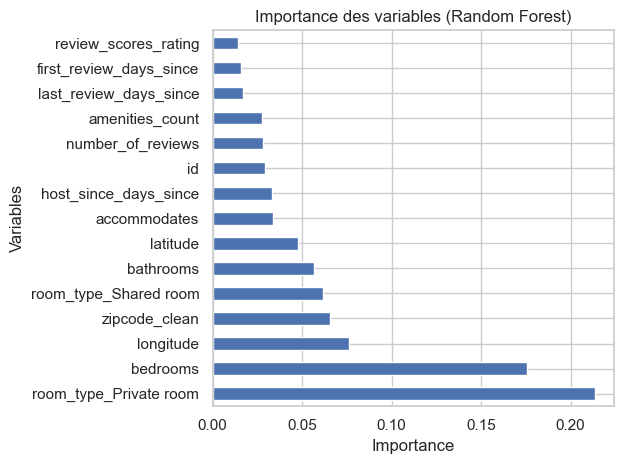

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Configuration d'affichage
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
# Définition de X et y
X = train_encoded.drop(columns=['log_price'])
y = train_encoded['log_price']

# 1. Suppression des colonnes datetime
datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns
X_no_datetime = X.drop(columns=datetime_cols)

# 2. Suppression des colonnes object
object_cols = X_no_datetime.select_dtypes(include=['object']).columns
X_no_obj = X_no_datetime.drop(columns=object_cols)

# 3. Split
X_train, X_val, y_train, y_val = train_test_split(X_no_obj, y, test_size=0.2, random_state=42)

# 4. Modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Évaluation
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE sur l'ensemble de validation : {rmse:.4f}")

# 6. Importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.nlargest(15).plot(kind='barh')
plt.title("Importance des variables (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


Bloc Évaluation du modèle

In [36]:
# 📊 Prédictions sur l’ensemble de validation
y_pred = model.predict(X_val)

# 📉 Calcul de l'erreur RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE sur validation : {rmse:.4f}")

# 🔍 Exemple de comparaison réelle vs prédite
comparison = pd.DataFrame({
    'Réel': y_val[:5].values,
    'Prédit': y_pred[:5]
})
print(comparison)


RMSE sur validation : 0.4134
       Réel    Prédit
0  5.393628  5.191656
1  3.912023  4.980054
2  5.416100  5.636876
3  3.806662  3.756765
4  5.700444  5.308405


Linear regression 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Remplacer les valeurs manquantes par la médiane
X_train_lr = X_train.fillna(X_train.median())
X_val_lr = X_val.fillna(X_train.median())

# 📌 Entraînement
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train)

# 📌 Prédiction
y_pred_lr = model_lr.predict(X_val_lr)

# 📌 Évaluation RMSE
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
print(f"Linear Regression → RMSE : {rmse_lr:.4f}")


Linear Regression → RMSE : 0.4292


Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor

# 📌 Entraînement
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# 📌 Prédiction
y_pred_dt = model_dt.predict(X_val)

# 📌 Évaluation RMSE
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt))
print(f"Decision Tree → RMSE : {rmse_dt:.4f}")


Decision Tree → RMSE : 0.5789


Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# Remplacer les valeurs manquantes par la médiane
X_train_gb = X_train.fillna(X_train.median())
X_val_gb = X_val.fillna(X_train.median())

# 📌 Entraînement
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train_gb, y_train)

# 📌 Prédiction
y_pred_gb = model_gb.predict(X_val_gb)

# 📌 Évaluation RMSE
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
print(f"Gradient Boosting → RMSE : {rmse_gb:.4f}")


Gradient Boosting → RMSE : 0.4156


Créer le fichier prediction.csv

In [40]:
# 🔧 Supprimer les colonnes datetime restantes si elles existent
colonnes_a_supprimer = ['host_since', 'first_review', 'last_review']
for col in colonnes_a_supprimer:
    if col in X.columns:
        X = X.drop(columns=[col])
    if col in test_encoded.columns:
        test_encoded = test_encoded.drop(columns=[col])


In [42]:
# Nettoyer les codes postaux pour qu'ils soient numériques
def clean_zip(zipcode):
    try:
        return int(str(zipcode).split('-')[0])
    except:
        return np.nan

train_encoded["zipcode"] = train_encoded["zipcode"].apply(clean_zip)
test_encoded["zipcode"] = test_encoded["zipcode"].apply(clean_zip)

# Remplacer les valeurs manquantes restantes par la médiane
train_encoded["zipcode"].fillna(train_encoded["zipcode"].median(), inplace=True)
test_encoded["zipcode"].fillna(train_encoded["zipcode"].median(), inplace=True)


/Users/filalidhia/.pyenv/versions/3.12.3/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/z1/3rm1d4yn57l91bgfzf786y0w0000gn/T/ipykernel_99180/3541211797.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_encoded["zipcode"].fillna(train_encoded["zipcode"].median(), inplace=True)
/Users/filalidhia/.pyenv/versions/3.12.3/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarnin

In [43]:
# --- Créer une nouvelle variable 'amenities_count' ---
def count_amenities(x):
    try:
        return len(x.strip('{}').split(','))
    except:
        return 0

train_encoded["amenities_count"] = train_encoded["amenities"].apply(count_amenities)
test_encoded["amenities_count"] = test_encoded["amenities"].apply(count_amenities)

# --- Supprimer la colonne texte 'amenities' ---
train_encoded.drop(columns=["amenities"], inplace=True)
test_encoded.drop(columns=["amenities"], inplace=True)


In [47]:
from sklearn.ensemble import GradientBoostingRegressor

# Séparer les features et la cible
X = train_encoded.drop(columns=["id", "log_price"])
y = train_encoded["log_price"]

# Filtrer pour ne garder que les colonnes numériques (hors texte/datetime)
X = X.select_dtypes(exclude=['object', 'datetime'])

# Aligner le jeu de test pour ne garder que les colonnes du train
test_features = test_encoded[X.columns]

# Imputation des valeurs manquantes par la médiane
X = X.fillna(X.median())
# Remplacement NaN par la médiane, en ignorant les colonnes avec toutes les valeurs manquantes
X = X.apply(lambda col: col.fillna(col.median() if not col.isna().all() else 0))
test_features = test_features.apply(lambda col: col.fillna(col.median() if not col.isna().all() else 0))
  # utiliser la médiane du train

# Entraînement du modèle
final_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y)

# Prédiction sur le jeu de test
y_test_pred = final_model.predict(test_features)

# Génération du fichier de soumission
submission = pd.DataFrame({
    "id": test_encoded["id"],
    "prediction": y_test_pred
})
submission.to_csv("prediction.csv", index=False)

print("Fichier 'prediction.csv' généré avec succès.")


Fichier 'prediction.csv' généré avec succès.


## 📈 Modélisation avec Prophet (optionnel - pour données temporelles)
Cette section utilise [Facebook Prophet](https://facebook.github.io/prophet/) pour modéliser une tendance temporelle du prix (log_price), si cela est pertinent.

2163.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


12:05:02 - cmdstanpy - INFO - Chain [1] start processing
12:05:02 - cmdstanpy - INFO - Chain [1] done processing


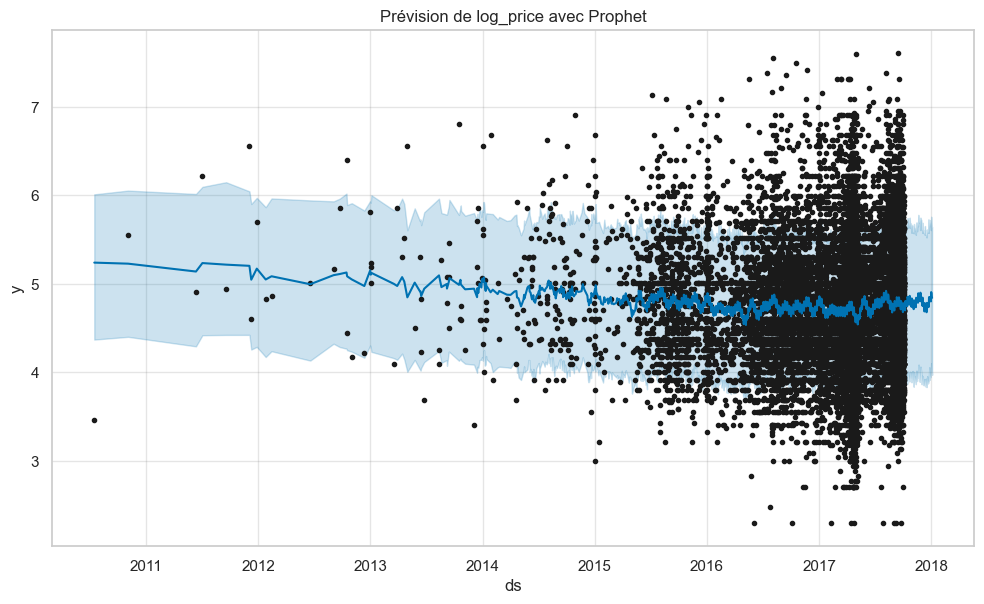

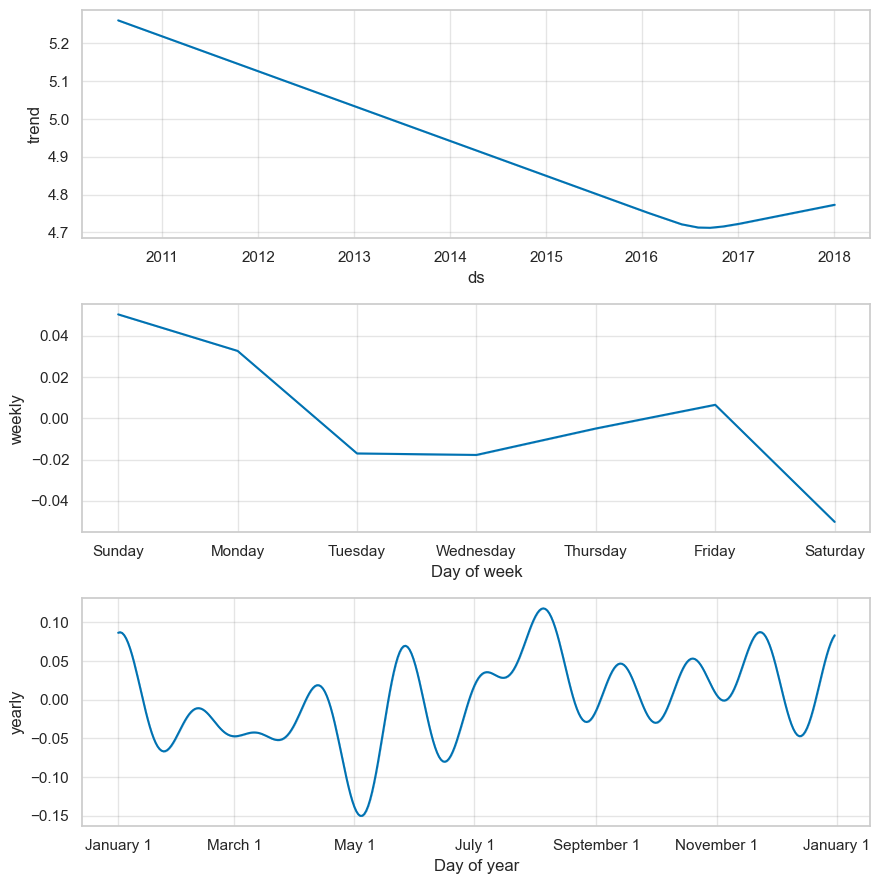

In [49]:
# 👉 Installation (si nécessaire)
!pip install prophet

from prophet import Prophet
df_prophet = train[['last_review', 'log_price']].dropna().copy()
df_prophet.rename(columns={'last_review': 'ds', 'log_price': 'y'}, inplace=True)

# S'assurer que la colonne de date est bien au format datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Initialisation et entraînement du modèle Prophet
model = Prophet()
model.fit(df_prophet)

# Génération de prévisions sur 90 jours
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Visualisation des résultats
fig1 = model.plot(forecast)
plt.title("Prévision de log_price avec Prophet")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error

# Séparer df_prophet pour validation temporelle (80% train, 20% test)
df_prophet = df_prophet.sort_values('ds')
split_idx = int(len(df_prophet) * 0.8)
df_train_p = df_prophet.iloc[:split_idx]
df_val_p = df_prophet.iloc[split_idx:]

# Réentraîner Prophet uniquement sur l'entraînement
prophet_model = Prophet()
prophet_model.fit(df_train_p)

# Prédire uniquement les dates de validation
future_val = df_val_p[['ds']]
forecast_val = prophet_model.predict(future_val)

# Calcul du RMSE sur la validation
rmse_prophet = np.sqrt(mean_squared_error(df_val_p['y'], forecast_val['yhat']))

# Ajouter au dictionnaire des résultats
results['Prophet (last_review)'] = rmse_prophet


12:17:10 - cmdstanpy - INFO - Chain [1] start processing
12:17:11 - cmdstanpy - INFO - Chain [1] done processing


## 🤖 Modèles de régression supervisée
Nous testons ici plusieurs modèles pour prédire `log_price` :
- **Régression linéaire**
- **Ridge** / **Lasso**
- **Random Forest**
- **XGBoost**

Les performances sont évaluées via la **Root Mean Squared Error (RMSE)**.

In [63]:
# Préparation des données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Choix des features simples pour test
features = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'room_type', 'property_type']
X = train[features]
y = train['log_price']

numerical = ['accommodates', 'bedrooms', 'beds', 'bathrooms']
categorical = ['room_type', 'property_type']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Détection des colonnes numériques et catégorielles
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Préprocesseur
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical)
])

# Split train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèles à tester (XGBoost retiré)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Exécution
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    results[name] = rmse

# Affichage
print("RMSE des modèles :")
for k, v in results.items():
    print(f"{k}: {v:.3f}")


RMSE des modèles :
Linear Regression: 0.500
Ridge: 0.500
Lasso: 0.558
Random Forest: 0.506


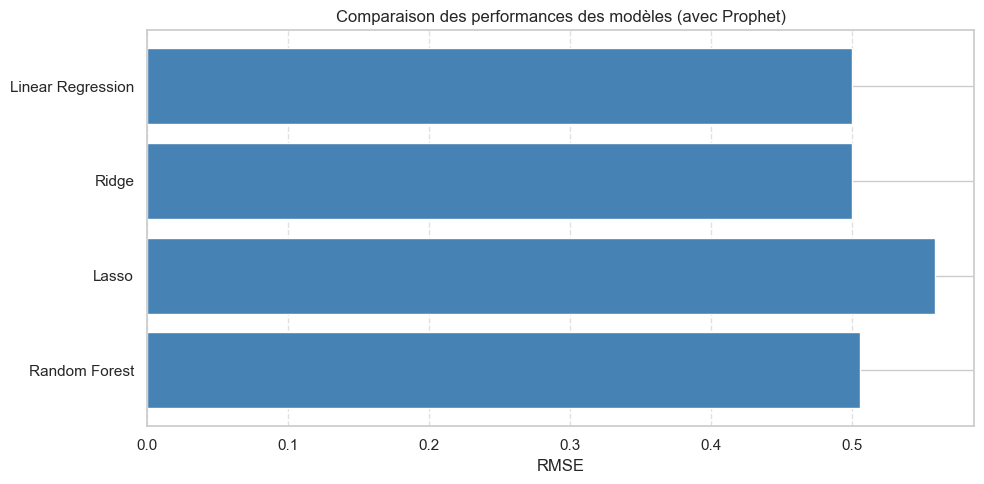

In [65]:
# Affichage du barplot avec Prophet inclus
plt.figure(figsize=(10, 5))
plt.barh(list(results.keys()), list(results.values()), color='steelblue')
plt.xlabel("RMSE")
plt.title("Comparaison des performances des modèles (avec Prophet)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Meilleur modèle supervisé : Linear Regression


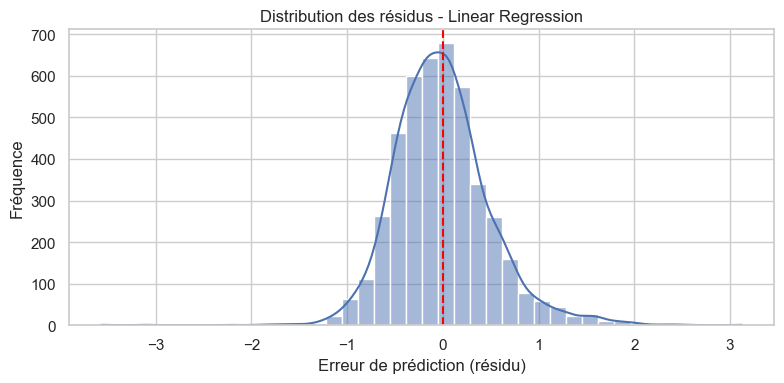

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identifier le meilleur modèle (celui avec le plus petit RMSE, hors Prophet si tu veux le comparer à part)
best_model_name = min(
    [k for k in results.keys() if 'Prophet' not in k],
    key=lambda k: results[k]
)

print(f"Meilleur modèle supervisé : {best_model_name}")

# Réentraîner le meilleur modèle sur tout le train/val
best_model = models[best_model_name]
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', best_model)
])
pipe.fit(X_train, y_train)
y_val_pred = pipe.predict(X_val)

# Calcul des résidus
residuals = y_val - y_val_pred

# Affichage des résidus
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=40, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title(f"Distribution des résidus - {best_model_name}")
plt.xlabel("Erreur de prédiction (résidu)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


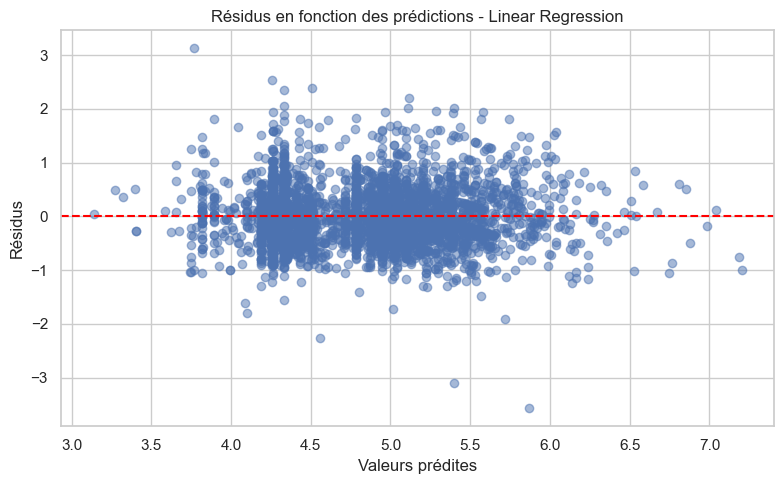

In [67]:
plt.figure(figsize=(8, 5))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title(f"Résidus en fonction des prédictions - {best_model_name}")
plt.tight_layout()
plt.show()
